**Author** ::
Muhammad Hassan Mukhtar

**Affiliation** ::
The University of Salford, Manchester, England, UK

**Connect** ::
[GitHub](https://github.com/MHM-Rajpoot)
[LinkedIn](https://www.linkedin.com/in/-muhammad-hassan-mukhtar-/)

### Env SetUp


In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Downloading and Exploring Data

This Python script uses the gdown library to download a file from Google Drive [Dataset Origin](https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset/data). It starts by importing gdown and defining the unique file ID (file_id) of the target file. The script then constructs a direct download URL using this file_id. Next, it calls gdown.download(url, 'RawResumeDataSet.csv', quiet=False), which downloads the file and saves it locally as "RawResumeDataSet.csv". The quiet=False parameter ensures that the download progress is displayed. Finally, it prints "File downloaded successfully!" to confirm that the process was completed.

In [ ]:
import gdown

file_id = '1MpVD889jtKHTT46NUsst44yOaRRQLLrL'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

gdown.download(url, 'RawResumeDataSet.csv', quiet=False)
print("File downloaded successfully!")

Downloading...
From: https://drive.google.com/uc?export=download&id=1MpVD889jtKHTT46NUsst44yOaRRQLLrL
To: /content/RawResumeDataSet.csv
100%|██████████| 5.55M/5.55M [00:00<00:00, 20.0MB/s]

File downloaded successfully!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

resumeDataSet = pd.read_csv('/content/RawResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1357 non-null   object
 1   Resume    1357 non-null   object
dtypes: object(2)
memory usage: 21.3+ KB


In [ ]:
resumeDataSet.shape

(1357, 2)

In [ ]:
len(resumeDataSet['Resume'][0])

4786

In [ ]:
print('Total Raw Data in Length for One Resume :: ',resumeDataSet.shape[0]*len(resumeDataSet['Resume'][0]))

Total Raw Data in Length for One Resume ::  6494602


In [ ]:
print ("Displaying the distinct categories of resume -",len(resumeDataSet['Category'].unique()))
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume - 32
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing' 'AGRICULTURE'
 'INFORMATION-TECHNOLOGY' 'BUSINESS-DEVELOPMENT' 'FINANCE' 'ADVOCATE'
 'ACCOUNTANT' 'ENGINEERING']


In [ ]:
df_filtered = resumeDataSet[["Resume", "Category"]]

df_filtered.to_csv("FilteredResumeDataSet.csv", index=False)

In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Category
Java Developer               84
Testing                      70
BUSINESS-DEVELOPMENT         60
ENGINEERING                  59
FINANCE                      57
AGRICULTURE                  56
ACCOUNTANT                   56
DevOps Engineer              55
ADVOCATE                     54
INFORMATION-TECHNOLOGY       53
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Operations Manager           40
Data Science                 40
Mechanical Engineer          40
Blockchain                   40
ETL Developer                40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing         

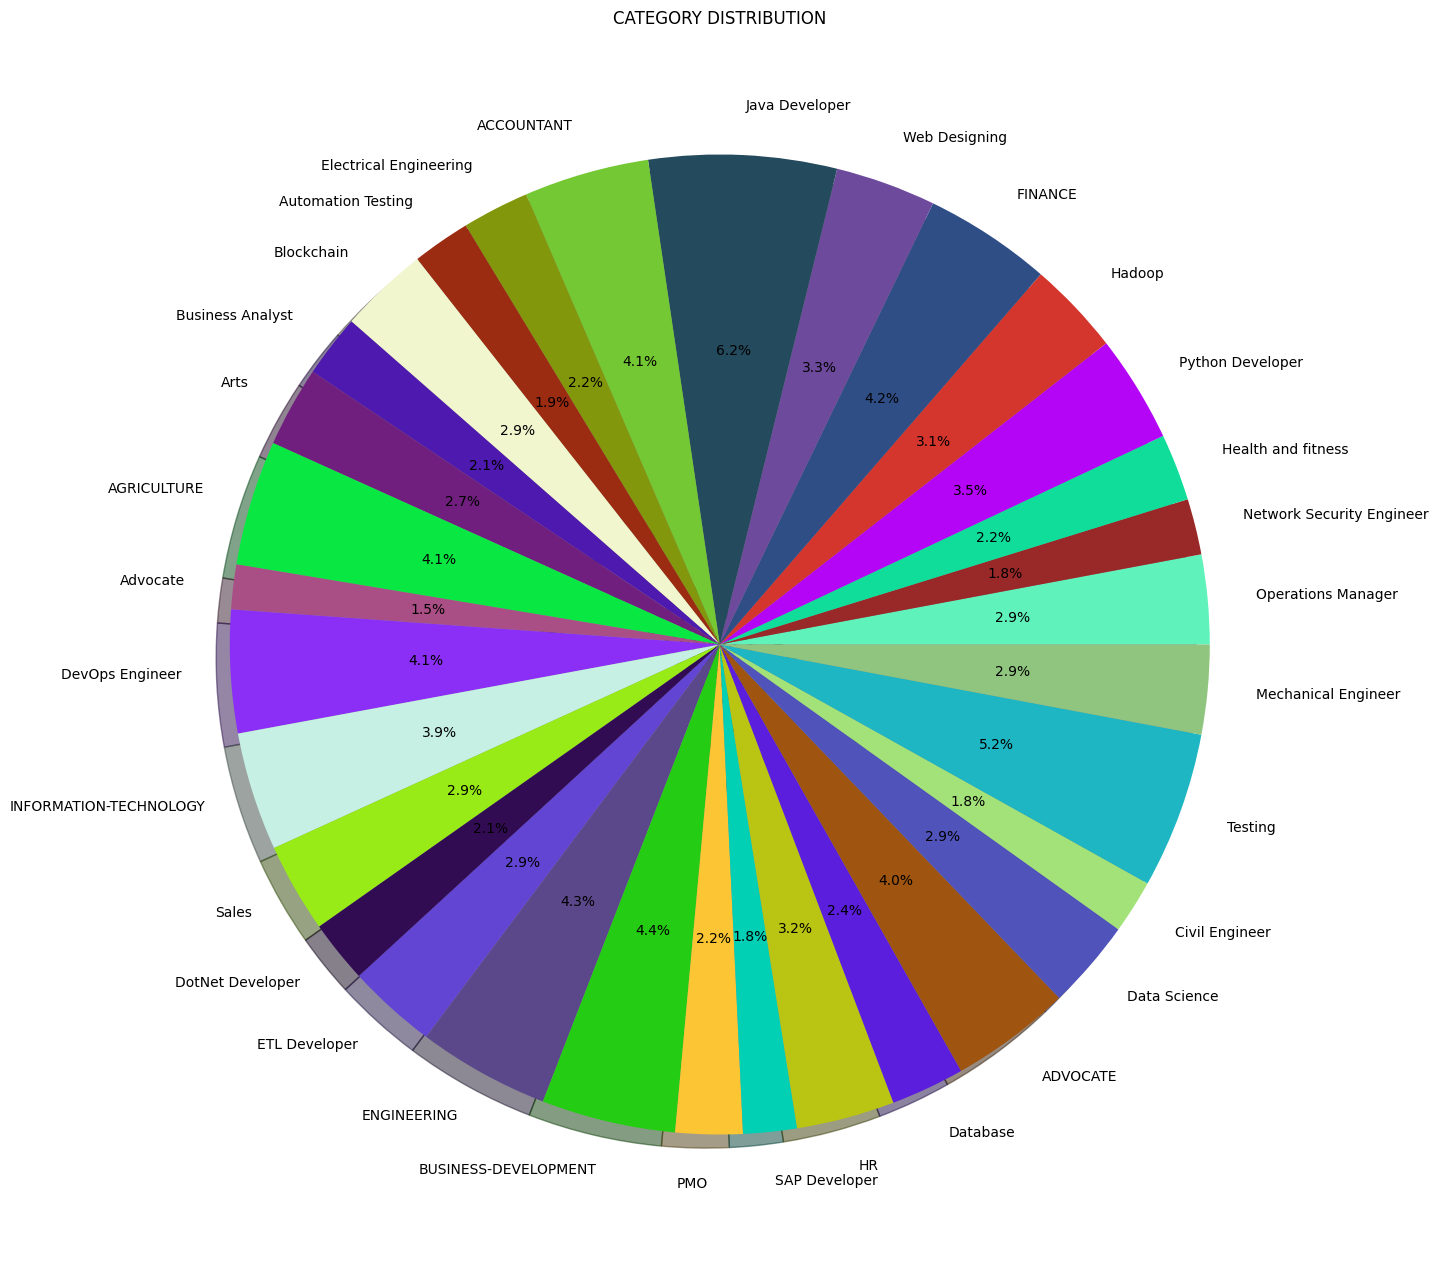

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

targetCounts = {category: list(resumeDataSet['Category']).count(category) for category in set(resumeDataSet['Category'])}
targetLabels = list(targetCounts.keys())

np.random.seed(42)
random_colors = np.random.rand(len(targetLabels), 3)

plt.figure(1, figsize=(35, 35))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
plt.pie(targetCounts.values(), labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=random_colors)
plt.show()


This Python script generates word clouds for different resume categories to visualize frequently occurring words. It first imports necessary libraries like nltk for stopwords, WordCloud for visualization, and matplotlib.pyplot for plotting. It defines a set of stopwords, including common English words and punctuation marks. The script retrieves unique job categories from the dataset (resumeDataSet['Category'].unique()) and creates subplots for each category. It then iterates through each category, extracts resumes belonging to that category, and combines them into a single text. A word cloud is generated for each category using WordCloud().generate(category_text), and the top words are stored in a dictionary (wcl). Finally, it plots all word clouds using plt.imshow() with titles and removes axes for better visualization. The layout is adjusted using fig.tight_layout(), and the plots are displayed with plt.show().

In [ ]:
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
categories = resumeDataSet['Category'].unique()
fig, axes = plt.subplots(nrows=len(categories), figsize=(15, 5*len(categories)))

wcl = {}

for i, category in enumerate(categories):
    category_resumes = resumeDataSet[resumeDataSet['Category'] == category]['Resume']
    category_text = ' '.join(category_resumes)

    wc = WordCloud().generate(category_text)
    wcl[category] = list(wc.words_.keys())

    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(category)
    axes[i].axis("off")

fig.tight_layout()

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in range(len(categories)):
    print(f"{categories[i]}  :  {wcl[categories[i]][:10]}",end='\n'*2)

Data Science  :  ['Exprience Less', 'Data Science', 'Machine Learning', 'year months', 'â', 'â ª', 'Data', 'Exprience months', 'Deep Learning', 'Python']

HR  :  ['â', 'Details company', 'Skill Details', 'Exprience months', 'HR Skill', 'Education Details', 'monthsCompany Details', 'HR', 'SKILLS â', 'employee']

Advocate  :  ['â', 'Legal', 'Law', 'Details company', 'description', 'University', 'Advocate', 'Court', 'Skill Details', 'Exprience Less']

Arts  :  ['Details company', 'British Council', 'Responsibilities Ã', 'Skill Details', 'Maharashtra State', 'company British', 'Council description', 'Sri Lanka', 'programme', 'event']

Web Designing  :  ['Exprience months', 'Responsibility â', 'â Designed', 'Project Description', 'â Made', 'BOOTSTRAP PHP', 'Technologies Used', 'Used HTML', 'HTML CSS', 'CSS BOOTSTRAP']

Mechanical Engineer  :  ['Mechanical Engineering', 'Role Responsibilities', 'Pvt Ltd', 'Details company', 'design engineer', 'Education Details', 'Skill Details', 'Vendor dev

### Cleaning

This Python script defines the cleanResume() function to preprocess and clean resume text using regular expressions. It removes URLs, retweet indicators ("RT" and "cc"), hashtags, and mentions, ensuring social media elements do not interfere with text analysis. Punctuation is replaced with spaces, non-ASCII characters are removed to handle encoding issues, and extra spaces are reduced to a single space for better readability. The function is then applied to the "Resume" column of the dataset using apply(lambda x: cleanResume(x)), storing the cleaned text in a new column, "CleanedResume," for further processing.

In [ ]:
import re

def cleanResume(resumeText):

    resumeText = re.sub('http\S+\s*', ' ', resumeText)
    resumeText = re.sub('RT|cc', ' ', resumeText)
    resumeText = re.sub('#\S+', '', resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)

    return resumeText

resumeDataSet['CleanedResume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\]'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\]'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3966450506.py:5: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('http\S+\s*', ' ', resumeText)
/tmp/ipython-input-3966450506.py:7: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('#\S+', '', resumeText)
/tmp/ipython-input-3966450506.py:8: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('@\S+', '  ', resumeText)
/tmp/ipython-input-3966450506.py:9: SyntaxWarning: invalid escape sequence '\]'
  resumeText = re.sub('[%s]' % 

In [ ]:
resumeDataSet[['Category', 'CleanedResume']].to_csv('CleanedResumeDataSet.csv', index=False)

### Preprocessing


This Python script preprocesses resume text by tokenizing, removing stopwords, and lemmatizing words for better NLP analysis. It first imports necessary libraries from nltk for tokenization, stopword filtering, and lemmatization. The preprocess_resume() function tokenizes the input text into sentences using sent_tokenize(), converts them to lowercase, and further tokenizes words using word_tokenize(). It filters out non-alphabetic words and removes common English stopwords. Each word is then lemmatized to its base form using WordNetLemmatizer(), and the processed words are joined back into sentences. Finally, the function is applied to the "CleanedResume" column of resumeDataSet using apply(lambda x: preprocess_resume(x)), storing the processed text in a new column, "PreprocessedResume," for further NLP tasks.

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def preprocess_resume(resume_text):

    sentences = sent_tokenize(resume_text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    preprocessed_sentences = []

    for sentence in sentences:

        sentence = sentence.lower()
        words = word_tokenize(sentence)
        words = [word for word in words if word.isalpha() and word.lower() not in stop_words]
        words = [lemmatizer.lemmatize(word) for word in words]
        preprocessed_sentence = ' '.join(words)

        preprocessed_sentences.append(preprocessed_sentence)

    preprocessed_text = ' '.join(preprocessed_sentences)
    return preprocessed_text

resumeDataSet['PreprocessedResume'] = resumeDataSet['CleanedResume'].apply(lambda x: preprocess_resume(x))

In [ ]:
resumeDataSet[['Category', 'PreprocessedResume']].to_csv('PreprocessedResumeDataSet.csv', index=False)

### Feature Engineering

In [ ]:
resumeDataSet = pd.read_csv('PreprocessedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet.head()

,Category,PreprocessedResume
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may may b e uit rgpv data sci...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...


In [ ]:
nan_values = resumeDataSet.isna().sum()

print(resumeDataSet.shape)
print("\nNaN values in each column:")
print(nan_values)

(1357, 2)

NaN values in each column:
Category              0
PreprocessedResume    0
dtype: int64


In [ ]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Category            1357 non-null   object
 1   PreprocessedResume  1357 non-null   object
dtypes: object(2)
memory usage: 21.3+ KB


In [ ]:
resumeDataSet = resumeDataSet.dropna()

print("\nShape of the DataFrame after dropping NaN values : ",resumeDataSet.shape)


Shape of the DataFrame after dropping NaN values :  (1357, 2)


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

var_mod = ['Category']
le = LabelEncoder()

for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

category_encoding = pd.DataFrame({'Category': le.classes_, 'Encoding': le.transform(le.classes_)} )

category_encoding.to_csv('category_encoding.csv', index=False)

In [ ]:
resumeDataSet.head()

,Category,PreprocessedResume
0,10,skill programming language python panda numpy ...
1,10,education detail may may b e uit rgpv data sci...
2,10,area interest deep learning control system des...
3,10,skill r python sap hana tableau sap hana sql s...
4,10,education detail mca ymcaust faridabad haryana...


This Python script processes resume text data using both [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html) and [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) embeddings while handling class imbalances with SMOTE. It first checks if [GloVe](https://github.com/stanfordnlp/GloVe?tab=readme-ov-file) embeddings exist; if not, it downloads and extracts them. Then, it loads the pretrained Word2Vec model from gensim and defines embed_text_word2vec(), which converts text into numerical vectors by averaging the embeddings of words present in the model. The generate_word2vec_features_with_smote() function applies this transformation to the dataset, splits the data into training and testing sets, and balances the training set using SMOTE to address class imbalances. Similarly, the script applies TF-IDF (Term Frequency-Inverse Document Frequency) for text vectorization using TfidfVectorizer with a vocabulary size of 1500. The generate_tfidf_features_with_smote() function vectorizes the text, splits it into train-test sets, and applies SMOTE to balance the training data. Finally, both feature sets are created using resumeDataSet['PreprocessedResume'] as input and resumeDataSet['Category'] as the target labels, resulting in balanced training and testing datasets for further classification tasks.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def generate_tfidf_features_with_smote(text_data, target_data, max_features=1500, test_size=0.2):

    vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=max_features)
    features = vectorizer.fit_transform(text_data)

    X_train, X_test, y_train, y_test = train_test_split(features, target_data, test_size=test_size, random_state=0, stratify=target_data)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    return X_train_resampled, X_test, y_train_resampled, y_test

requiredText = resumeDataSet['PreprocessedResume'].values
requiredTarget = resumeDataSet['Category'].values

X_train_t, X_test_t, y_train_t, y_test_t = generate_tfidf_features_with_smote(requiredText, requiredTarget)

In [ ]:
import gensim.downloader as api
import numpy as np

w2v_model = api.load("word2vec-google-news-300")

def embed_text_word2vec(text, model):
    words = text.split()
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

def generate_word2vec_features_with_smote(text_data, target_data, test_size=0.2):

    word2vec_features = np.array([embed_text_word2vec(text, w2v_model) for text in text_data])

    X_train, X_test, y_train, y_test = train_test_split(word2vec_features, target_data, test_size=test_size, random_state=0, stratify=target_data)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    return X_train_resampled, X_test, y_train_resampled, y_test

requiredText = resumeDataSet['PreprocessedResume'].values
requiredTarget = resumeDataSet['Category'].values

X_train_w, X_test_w, y_train_w, y_test_w = generate_word2vec_features_with_smote(requiredText, requiredTarget)

In [ ]:
import os
import zipfile
import urllib.request

glove_url = "https://huggingface.co/stanfordnlp/glove/resolve/main/glove.42B.300d.zip"
glove_zip_path = "glove.42B.300d.zip"
glove_extracted_folder = "glove/"
glove_file_path = os.path.join(glove_extracted_folder, "glove.42B.300d.txt")

def download_progress(block_num, block_size, total_size):
    downloaded = block_num * block_size
    percent = min(100, downloaded * 100 / total_size)
    print(f"\rDownloading: {percent:.2f}%", end="")

# Download GloVe if not already present
if not os.path.exists(glove_file_path):
    print("Downloading GloVe embeddings...")
    urllib.request.urlretrieve(glove_url, glove_zip_path, reporthook=download_progress)
    print("\nDownload complete!")

    # Extract ZIP file
    print("Extracting GloVe embeddings...")
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(glove_extracted_folder)

    # Clean up ZIP file after extraction
    os.remove(glove_zip_path)

print("GloVe embeddings ready!")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def load_glove_embeddings(glove_file_path):
    glove_embeddings = {}
    with open(glove_file_path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_embeddings[word] = vector
    return glove_embeddings

glove_model = load_glove_embeddings(glove_file_path)

def embed_text_glove(text, model, embedding_dim=300):
    words = text.split()
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(embedding_dim)
    return np.mean(word_vectors, axis=0)

def generate_glove_features_with_smote(text_data, target_data, test_size=0.2):

    glove_features = np.array([embed_text_glove(text, glove_model) for text in text_data])
    X_train, X_test, y_train, y_test = train_test_split(glove_features, target_data, test_size=test_size, random_state=0, stratify=target_data)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    return X_train_resampled, X_test, y_train_resampled, y_test

requiredText = resumeDataSet['PreprocessedResume'].values
requiredTarget = resumeDataSet['Category'].values

X_train_g, X_test_g, y_train_g, y_test_g = generate_glove_features_with_smote(requiredText, requiredTarget)


### Modeling

**Key Parameters of Random Forest:**

- n_estimators – Number of decision trees in the forest (higher values improve stability but increase computation time).
- max_depth – Maximum depth of each tree (controls complexity and prevents overfitting).
- min_samples_split – Minimum samples required to split a node (higher values reduce overfitting).
- min_samples_leaf – Minimum samples required at a leaf node (prevents small, insignificant splits).
- max_features – Number of features considered at each split (improves generalization).
- bootstrap – Whether to sample data with replacement (default is True, enabling bagging).
- random_state – Seed for reproducibility.

**Why Random Forest is Good for Unstructured Text Data?**

- Handles High-Dimensional Data Well – Text data transformed via TF-IDF or Word Embeddings often has thousands of features, and Random Forest can effectively handle such high-dimensional spaces.
- Reduces Overfitting – By averaging multiple trees, it generalizes better than a single decision tree.
- Robust to Noisy Data – Works well with irrelevant or redundant features, which are common in text data.
- Interpretable – Feature importance can be analyzed to understand which words contribute most to classification.

However, Random Forest does not capture sequential context in text, making it less effective than deep learning models (like LSTMs or Transformers) for certain NLP tasks.

#### TfidfVectorizer

In [ ]:
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train_t, y_train_t)

joblib.dump(clf, 'TfidfVectorizer_classifier.joblib')
print("Model trained and saved as 'resume_classifier.joblib'")

In [ ]:
print(clf.get_params())

In [ ]:
prediction_t = clf.predict(X_test_t)
print('TfidfVectorizer')
print('Accuracy of Classifier on training set: {:.2f}'.format(clf.score(X_train_t, y_train_t)))
print('Accuracy of Classifier on test set: {:.2f}'.format(clf.score(X_test_t, y_test_t)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test_t, prediction_t)))

#### word2vec

In [ ]:
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train_w, y_train_w)

In [ ]:
print(clf.get_params())

In [ ]:
prediction_w = clf.predict(X_test_w)
print('word2vec')
print('Accuracy of Classifier on training set: {:.2f}'.format(clf.score(X_train_w, y_train_w)))
print('Accuracy of Classifier on test set: {:.2f}'.format(clf.score(X_test_w, y_test_w)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test_w, prediction_w)))

#### GloVe

In [ ]:
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train_g, y_train_g)

In [ ]:
print(clf.get_params())

In [ ]:
prediction_g = clf.predict(X_test_g)
print('Glove')
print('Accuracy of Classifier on training set: {:.2f}'.format(clf.score(X_train_g, y_train_g)))
print('Accuracy of Classifier on test set: {:.2f}'.format(clf.score(X_test_g, y_test_g)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test_g, prediction_g)))

### Evaluation with Visulization

#### TfidfVectorizer

In [ ]:
precision = metrics.precision_score(y_test_t, prediction_t, average='weighted')
print("Precision:", precision)

recall = metrics.recall_score(y_test_t, prediction_t, average='weighted')
print("Recall:", recall)

f1_score = metrics.f1_score(y_test_t, prediction_t, average='weighted')
print("F1 Score:", f1_score)

accuracy = metrics.accuracy_score(y_test_t, prediction_t)
print("Accuracy:", accuracy)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(metrics.confusion_matrix(y_test_t, prediction_t), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted labels \n\n Testing Data Only Confusion Matrix")
plt.ylabel("True labels")
plt.show()

#### word2vec

In [ ]:
precision = metrics.precision_score(y_test_w, prediction_w, average='weighted')
print("Precision:", precision)

recall = metrics.recall_score(y_test_w, prediction_w, average='weighted')
print("Recall:", recall)

f1_score = metrics.f1_score(y_test_w, prediction_w, average='weighted')
print("F1 Score:", f1_score)

accuracy = metrics.accuracy_score(y_test_w, prediction_w)
print("Accuracy:", accuracy)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(metrics.confusion_matrix(y_test_t, prediction_w), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted labels \n\n Testing Data Only Confusion Matrix")
plt.ylabel("True labels")
plt.show()

#### GloVe

In [ ]:
precision = metrics.precision_score(y_test_w, prediction_g, average='weighted')
print("Precision:", precision)

recall = metrics.recall_score(y_test_w, prediction_g, average='weighted')
print("Recall:", recall)

f1_score = metrics.f1_score(y_test_w, prediction_g, average='weighted')
print("F1 Score:", f1_score)

accuracy = metrics.accuracy_score(y_test_w, prediction_g)
print("Accuracy:", accuracy)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(metrics.confusion_matrix(y_test_t, prediction_g), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted labels \n\n Testing Data Only Confusion Matrix")
plt.ylabel("True labels")
plt.show()